In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import missingno as msno

In [3]:
#  ! pip install missingno

In [4]:
df=pd.read_csv('Base_Problem_DataSet.csv',low_memory=False)


In [5]:
df.Default.value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

In [81]:
df.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0


In [82]:
df.columns

Index(['ID', 'Patron_Salary', 'Automobile_Possession', 'Two-Wheeler_Ownership',
       'Ongoing_Borrowing', 'Residence_Proprietorship', 'Offspring_Number',
       'Loan_Capital', 'Borrowing_Periodic_Payment',
       'Customer_Revenue_Category', 'Patron_Academic_Qualification',
       'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Elderliness_in_Days', 'Work_Duration_in_Days',
       'Enlistment_Period_in_Days', 'Identity_Age_in_Days',
       'Private_Dwelling_Duration', 'Cellphone_Marker',
       'Residential_Phone_Marker', 'Employment_Phone_Operation',
       'Customer_Vocation', 'Patron_Kin_Count', 'Customer_Urban_Area_Ranking',
       'Request_Submission_Day', 'Request_Submission_Hour',
       'Patron_Constant_Correspondence_Marker',
       'Customer_Professional_Communication_Marker', 'Sort_of_Institution',
       'Rating_Origin_1', 'Rating_Origin_2', 'Rating_Origin_3',
       '

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118249 non-null  object 
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118224 non-null  object 
 8   Borrowing_Periodic_Payment                  117044 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

In [84]:
df.describe()

,ID,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Rating_Origin_1,Rating_Origin_2,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [85]:
# Identify the numerical and categorical features
num_feat=[x for x in df.columns if df[x].dtype!='O']
cat_feat=[x for x in df.columns if df[x].dtype=='O']

Variables which are not of categorical type but do not have the datatype as Object.

In [86]:
imporoper_categories={ x:len(df[x].value_counts()) for x in cat_feat if len(df[x].value_counts())> 30 and  len(df[x].value_counts())!=58 }
#numerical values  that are wrongly flaagged as categories

In [87]:
imporoper_categories

{'Patron_Salary': 1217,
 'Loan_Capital': 4176,
 'Borrowing_Periodic_Payment': 10858,
 'Population_Fraction_by_Region': 83,
 'Elderliness_in_Days': 17001,
 'Work_Duration_in_Days': 9950,
 'Enlistment_Period_in_Days': 14143,
 'Identity_Age_in_Days': 5963,
 'Rating_Origin_3': 772}

In [88]:
improper_numeric={x:len(df[x].value_counts()) for x in num_feat if len(df[x].value_counts())< 30}
#categorical values  that are wrongly flaagged as numericals


In [89]:
improper_numeric

{'Automobile_Possession': 2,
 'Two-Wheeler_Ownership': 2,
 'Ongoing_Borrowing': 2,
 'Residence_Proprietorship': 2,
 'Offspring_Number': 14,
 'Cellphone_Marker': 2,
 'Residential_Phone_Marker': 2,
 'Employment_Phone_Operation': 2,
 'Patron_Kin_Count': 15,
 'Customer_Urban_Area_Ranking': 3,
 'Request_Submission_Day': 7,
 'Request_Submission_Hour': 24,
 'Solvency_Information_Agency': 21,
 'Default': 2}

In [90]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
num_feat.extend(imporoper_categories.keys())
num_feat=[ x for x in num_feat if x not in improper_numeric]
cat_feat.extend(improper_numeric.keys())
cat_feat=[ x for x in cat_feat if x not in imporoper_categories]
for i in imporoper_categories.keys() :
    # print(i)
    df[i].replace(['#VALUE!','@','#','x','$','&'],0,inplace=True)
    # df[i].fillna(0,inplace=True)
    df[i]=df[i].astype('float')
for i in improper_numeric.keys():
    # print(i)
    # df[i] = imputer.fit_transform(df[[i]])
    df[i]=df[i].astype(object)



In [91]:
for i in cat_feat:
    print(df[i].value_counts(normalize=True)*100)
    print("***____****")
    

Customer_Revenue_Category
Service            51.650798
Commercial         23.497948
Retired            17.809657
Govt Job            7.027210
Student             0.006771
Unemployed          0.005078
Maternity leave     0.001693
Businessman         0.000846
Name: proportion, dtype: float64
***____****
Patron_Academic_Qualification
Secondary             70.984088
Graduation            24.379288
Graduation dropout     3.349942
Junior secondary       1.230850
Post Grad              0.055832
Name: proportion, dtype: float64
***____****
Customer_Conjugal_State
M    73.785087
S    14.701435
D     6.382673
W     5.130804
Name: proportion, dtype: float64
***____****
Patron_Sex
Male      65.690748
Female    34.306740
XNA        0.002512
Name: proportion, dtype: float64
***____****
Borrowing_Agreement_Category
CL    90.620532
RL     9.379468
Name: proportion, dtype: float64
***____****
Customer_Living_Arrangement
Home         88.745779
Family        4.893838
Municipal     3.594851
Rental        

In [92]:
cat_feat

['Customer_Revenue_Category',
 'Patron_Academic_Qualification',
 'Customer_Conjugal_State',
 'Patron_Sex',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Customer_Vocation',
 'Patron_Constant_Correspondence_Marker',
 'Customer_Professional_Communication_Marker',
 'Sort_of_Institution',
 'Automobile_Possession',
 'Two-Wheeler_Ownership',
 'Ongoing_Borrowing',
 'Residence_Proprietorship',
 'Offspring_Number',
 'Cellphone_Marker',
 'Residential_Phone_Marker',
 'Employment_Phone_Operation',
 'Patron_Kin_Count',
 'Customer_Urban_Area_Ranking',
 'Request_Submission_Day',
 'Request_Submission_Hour',
 'Solvency_Information_Agency',
 'Default']

In [93]:
num_feat

['ID',
 'Private_Dwelling_Duration',
 'Rating_Origin_1',
 'Rating_Origin_2',
 'Community_Non-Payment_Incidence',
 'Telecommunication_Switch',
 'Patron_Salary',
 'Loan_Capital',
 'Borrowing_Periodic_Payment',
 'Population_Fraction_by_Region',
 'Elderliness_in_Days',
 'Work_Duration_in_Days',
 'Enlistment_Period_in_Days',
 'Identity_Age_in_Days',
 'Rating_Origin_3']

#  Missing data Viualization


<Axes: >

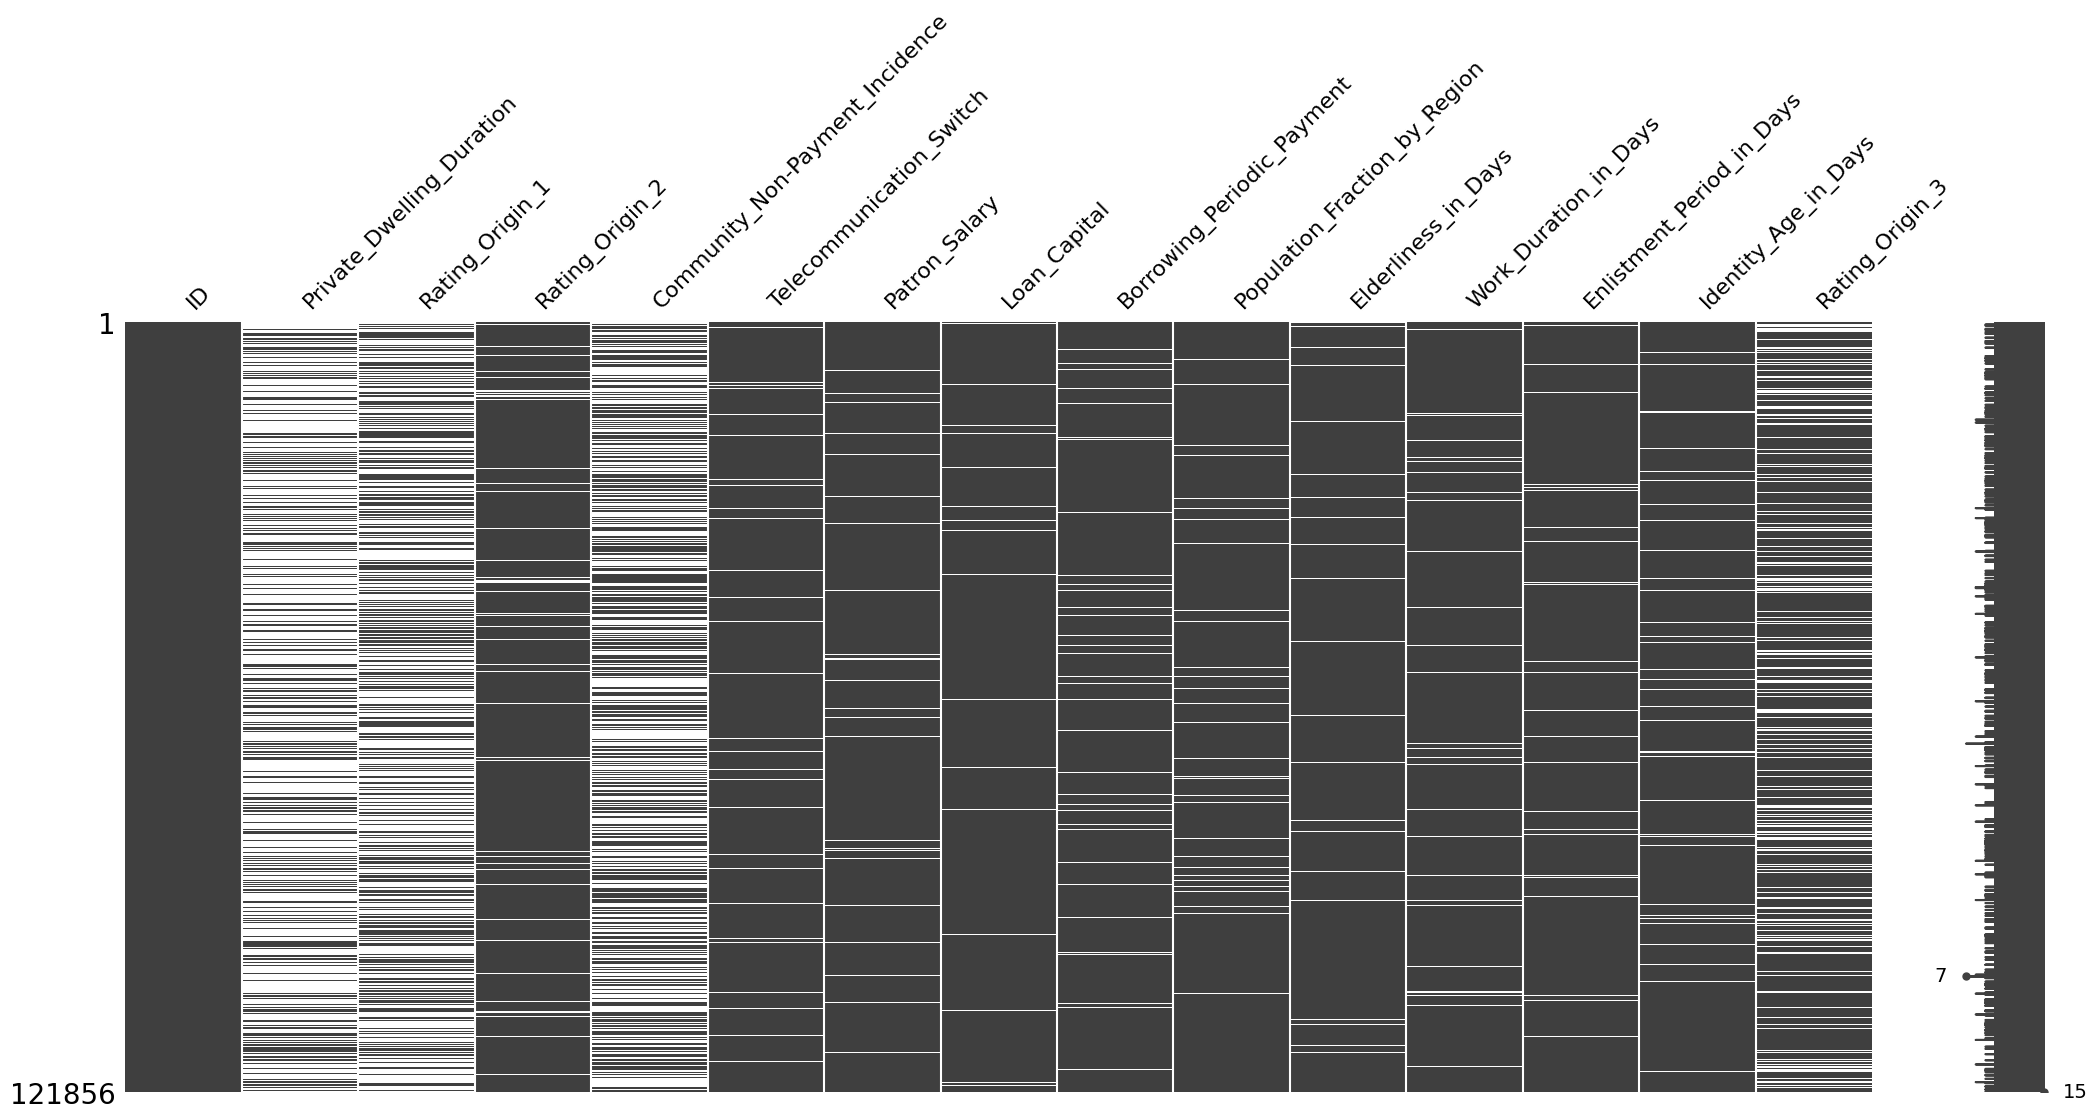

In [16]:
msno.matrix(df[num_feat])

<Axes: >

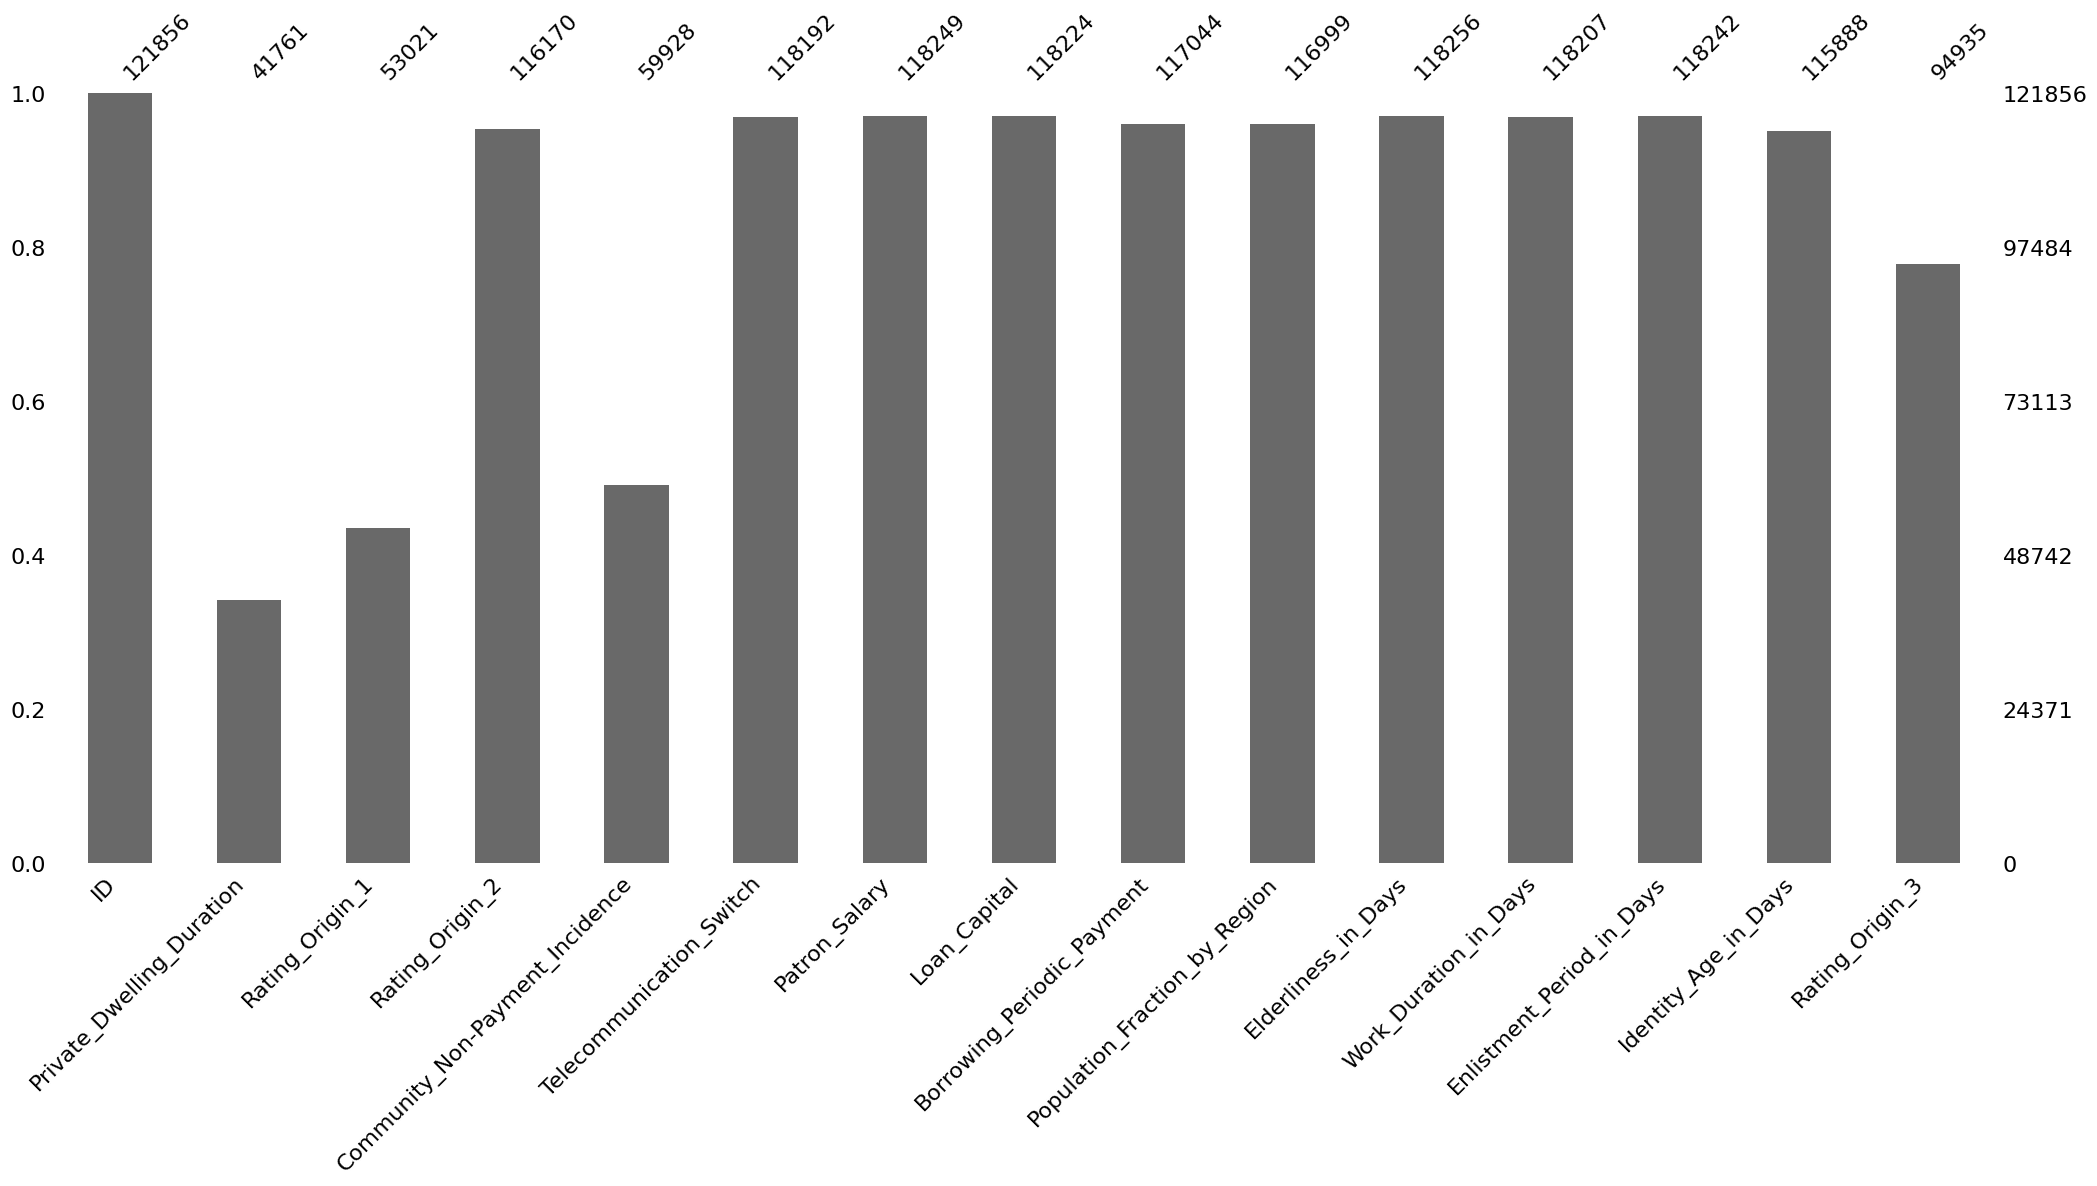

In [17]:
msno.bar(df[num_feat])

We have Private_Dwelling_Duration, rating_origin_1,Community_Non_payment_incidence as the three features with max unknown values

<Axes: >

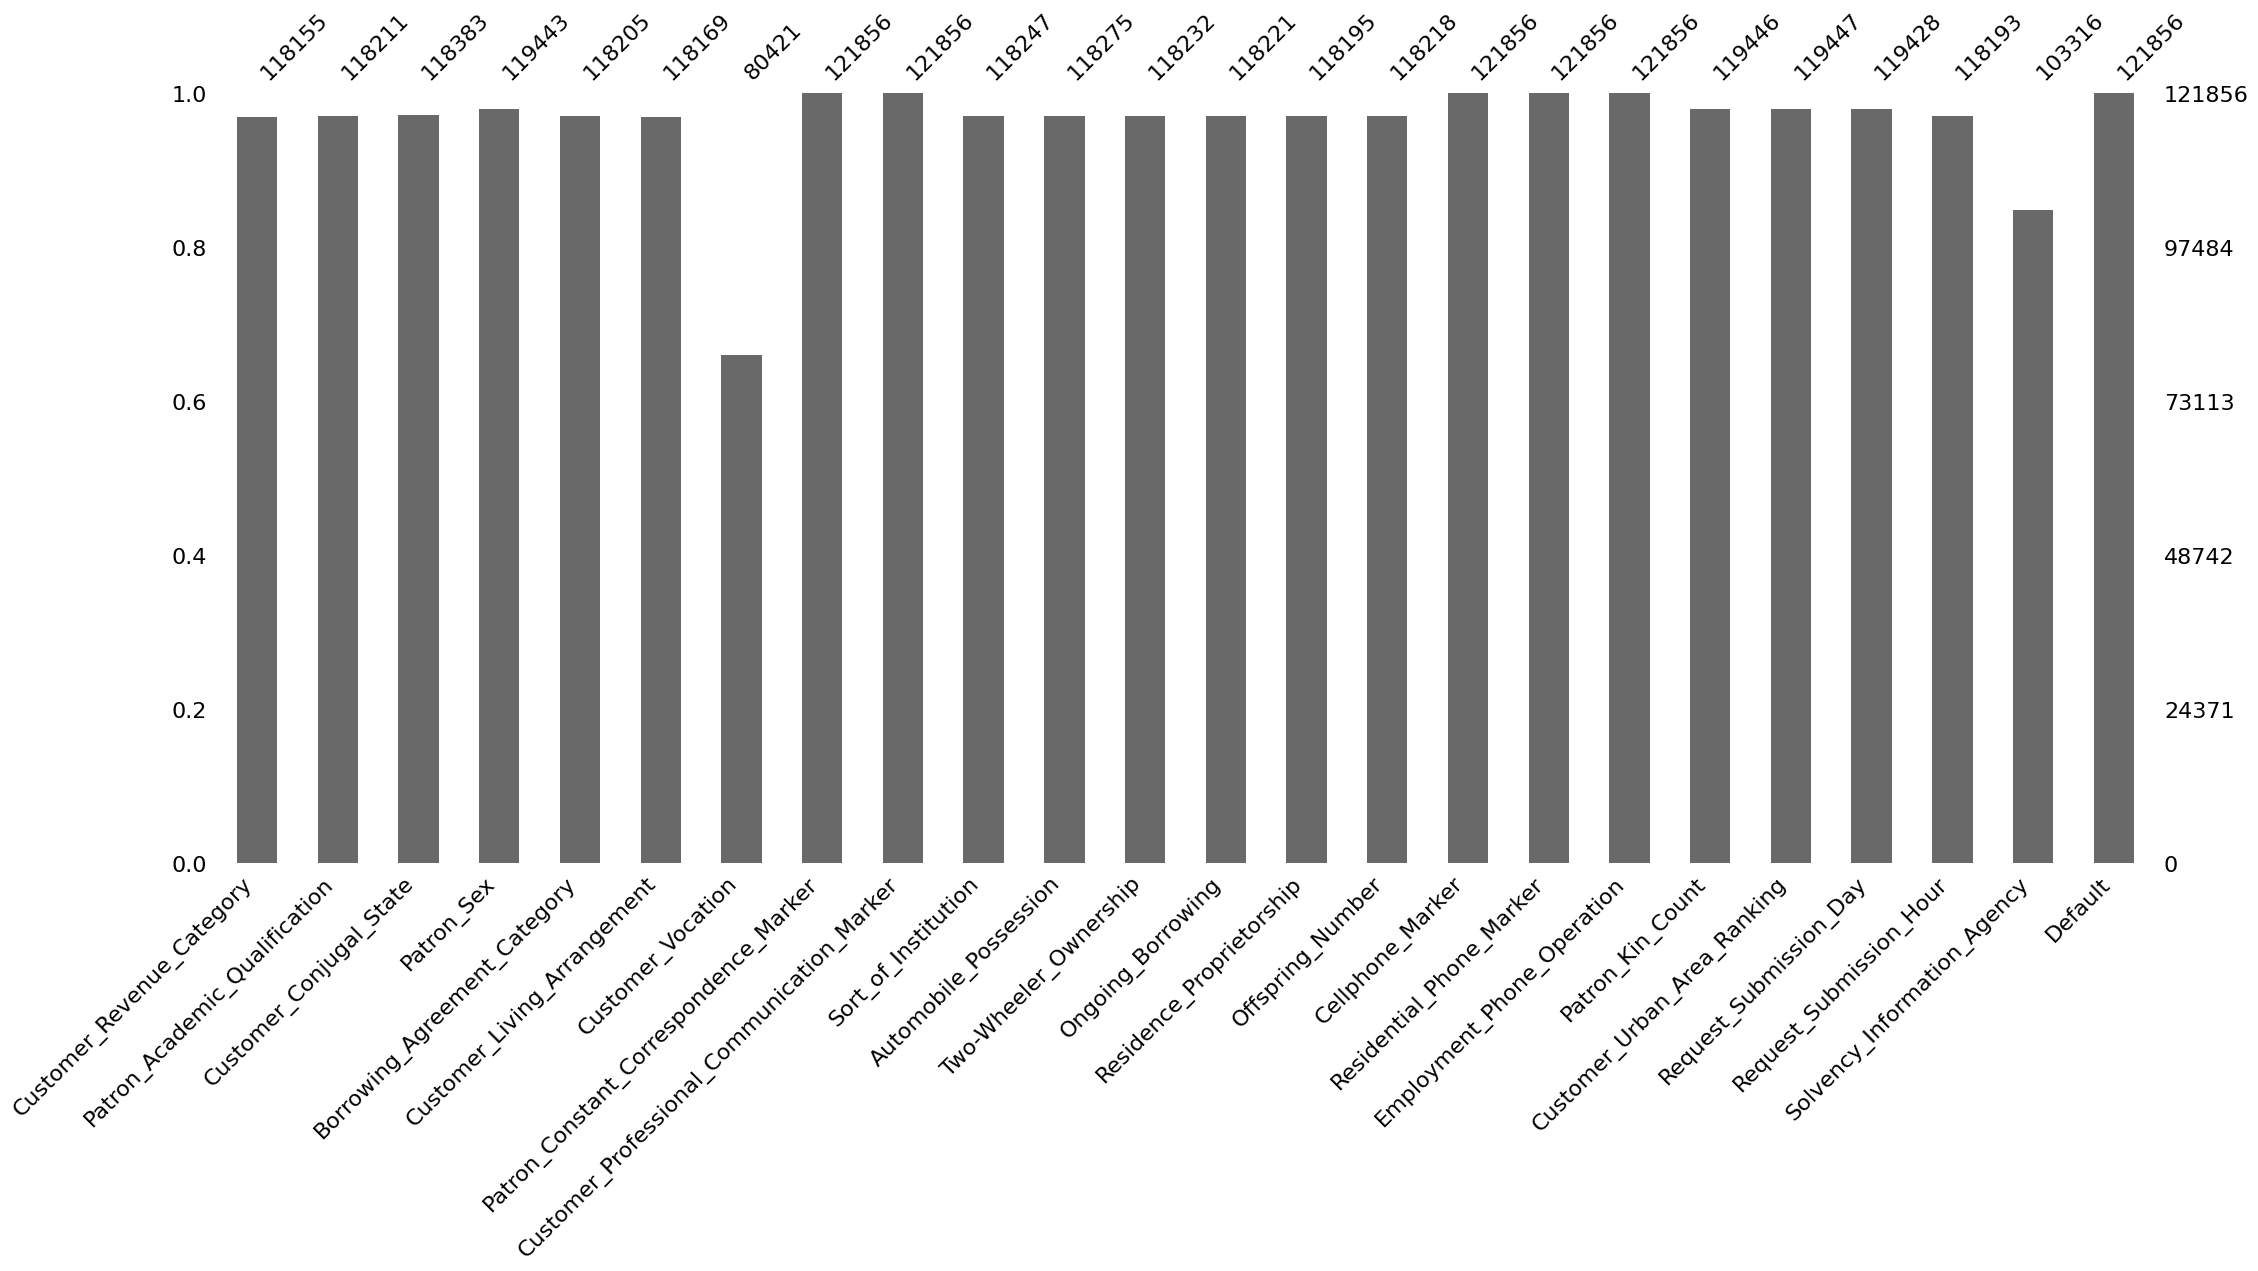

In [18]:
msno.bar(df[cat_feat])

In [19]:
df.isna().sum()


ID                                                0
Patron_Salary                                  3607
Automobile_Possession                          3581
Two-Wheeler_Ownership                          3624
Ongoing_Borrowing                              3635
Residence_Proprietorship                       3661
Offspring_Number                               3638
Loan_Capital                                   3632
Borrowing_Periodic_Payment                     4812
Customer_Revenue_Category                      3701
Patron_Academic_Qualification                  3645
Customer_Conjugal_State                        3473
Patron_Sex                                     2413
Borrowing_Agreement_Category                   3651
Customer_Living_Arrangement                    3687
Population_Fraction_by_Region                  4857
Elderliness_in_Days                            3600
Work_Duration_in_Days                          3649
Enlistment_Period_in_Days                      3614
Identity_Age

In [20]:
l5=df.columns[df.isna().sum()>5000]
m5=df.columns[df.isna().sum()<5000]


In [26]:
len(num_feat)

15

## Univariate Analysis

### Numerical Data

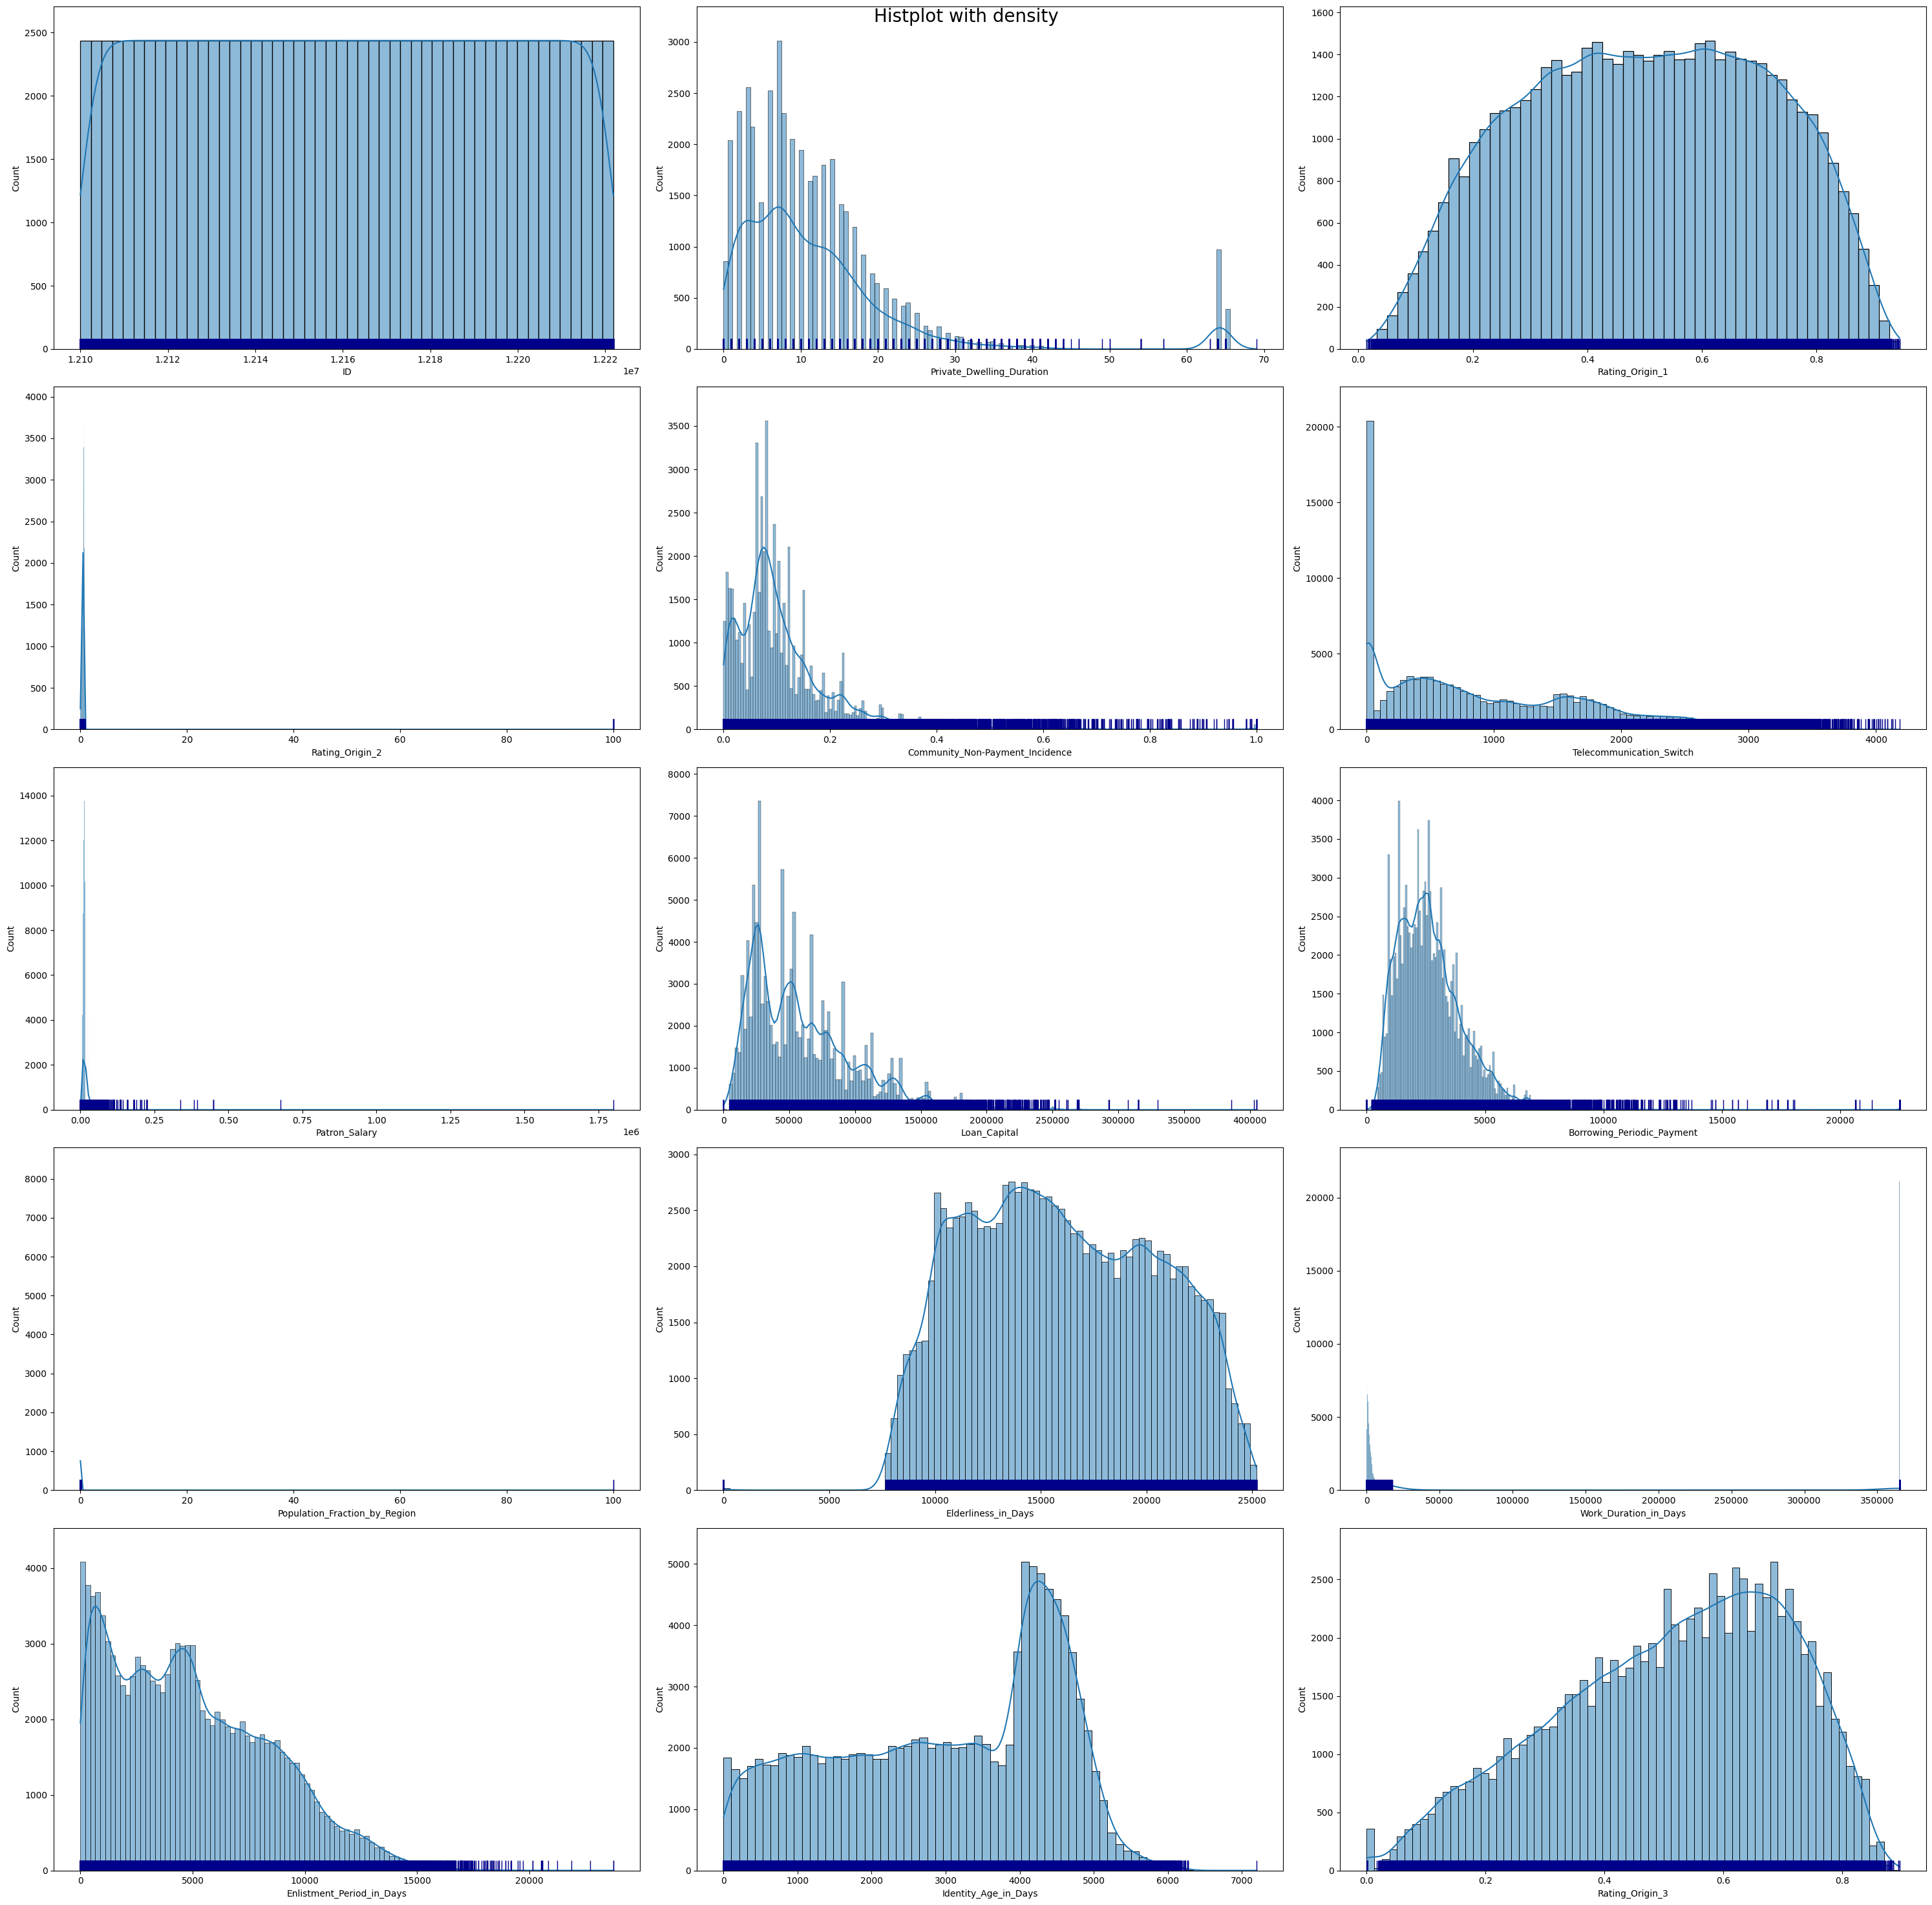

In [27]:
plt.figure(figsize=(30,30))
plt.suptitle("Histplot with density",fontsize=20,fontweight=10)
for i , j in enumerate(num_feat):
    plt.subplot(5,3,i+1)
    sns.histplot(x=df[j],kde=True)
    sns.rugplot(x=df[j],height=.03,color='darkblue')
plt.tight_layout()

# From the above Plot we could see that
private Dwelling Duration, Community non payment incidence, Telecommunication Switch,
Patreon_salary, Load capital, enlistment period  and periodic payment  are right skewed.


and there are many outliers in Community non payment incidence, Loan_Capital, Periodic Payment and enlisment period. 
    

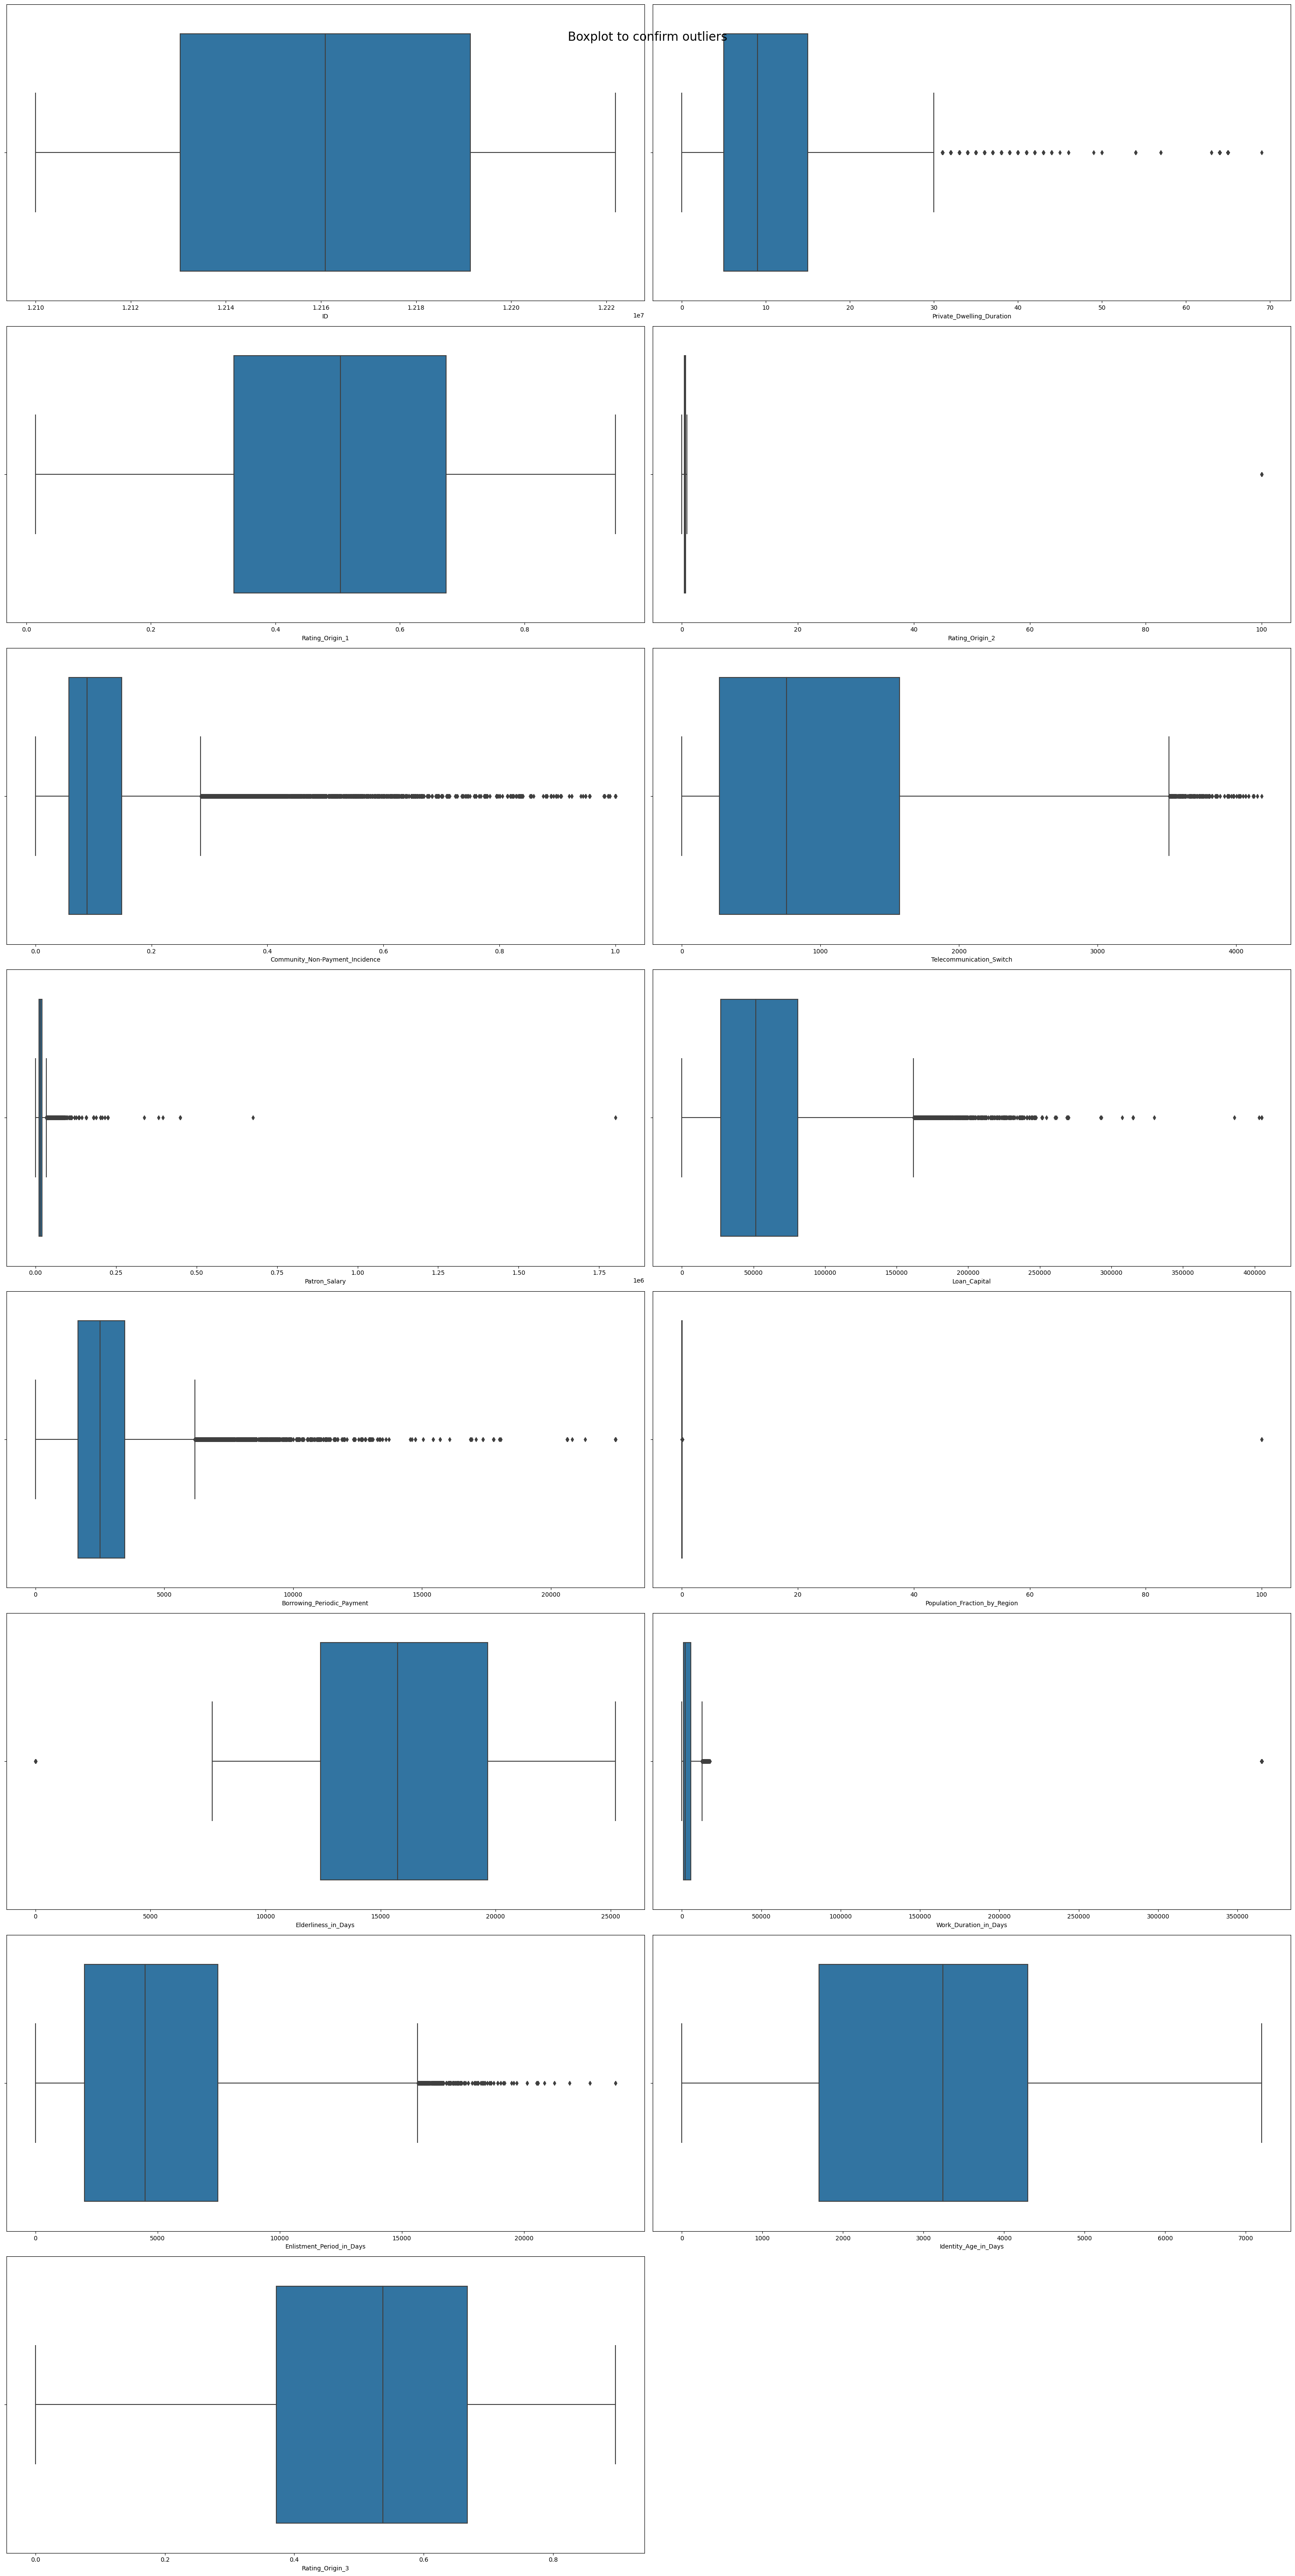

In [34]:
plt.figure(figsize=(30,60))
plt.suptitle("Boxplot to confirm outliers",fontsize=20,fontweight=20)
for i,j in enumerate(num_feat):
    plt.subplot(8,2,i+1)
    sns.boxplot(x=df[j])
plt.tight_layout()

In [35]:
len(cat_feat)

24

From the above Visualization we could confirm the outliers from our previous plot.

### Categorical

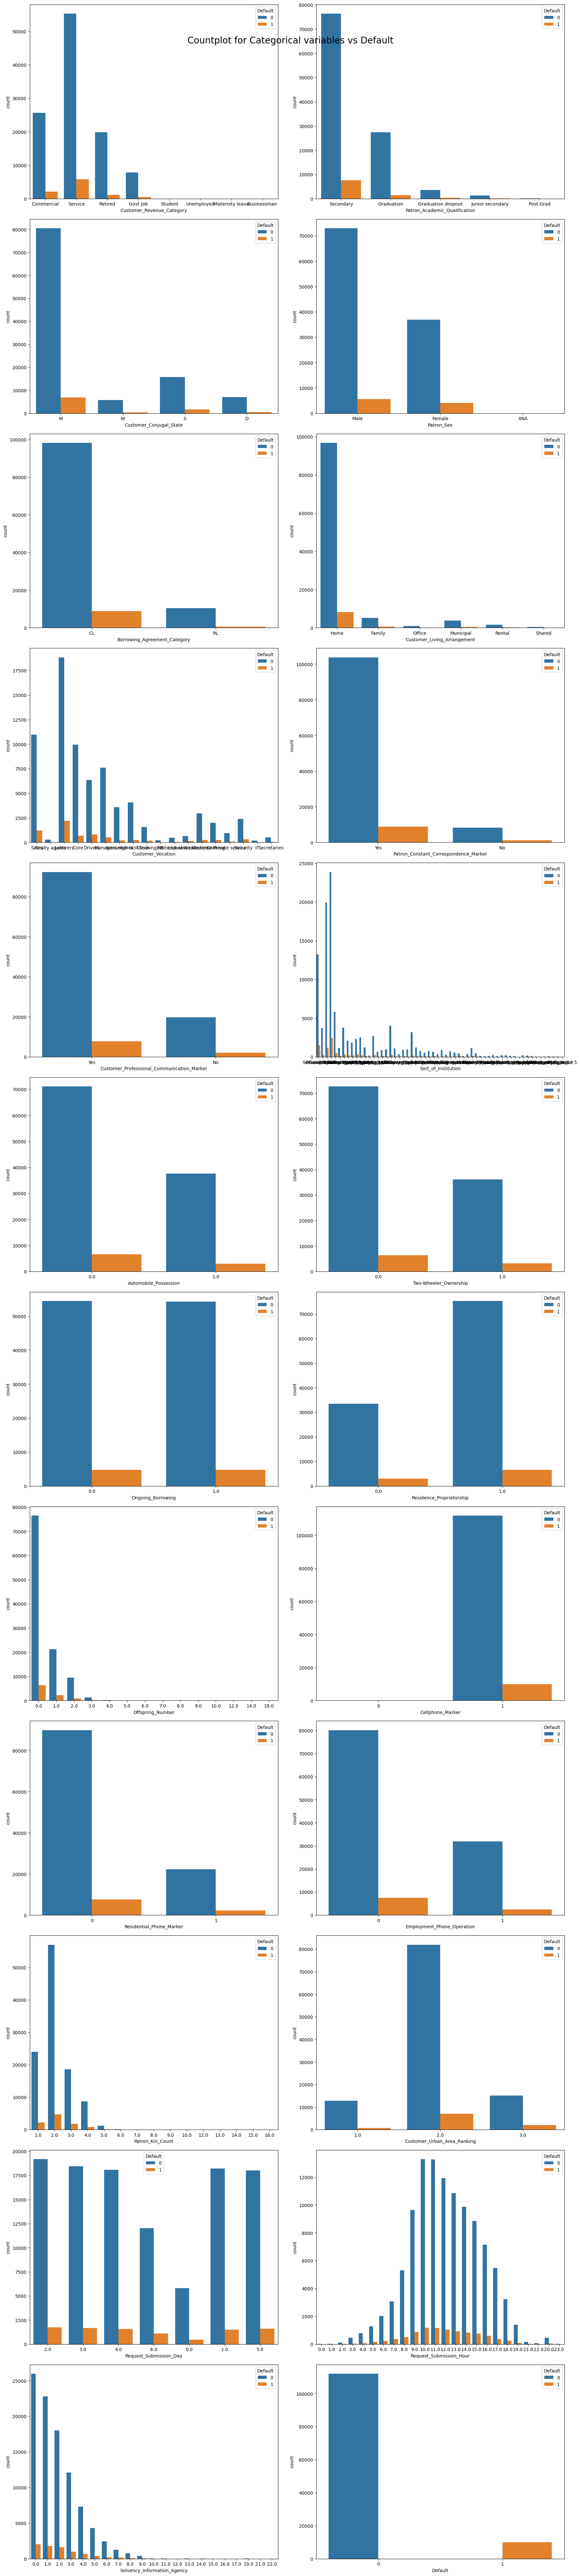

In [49]:
plt.figure(figsize=(18,80))
plt.suptitle("Countplot for Categorical variables vs Default",fontsize=20,fontweight=20)
for i,j in enumerate(cat_feat):
    plt.subplot(12,2,i+1)
    sns.countplot(data=df,x=j,hue='Default')
plt.tight_layout()

In [96]:
t=num_feat
t.append('Default')
df[t].groupby(by='Default').agg('mean')

,ID,Private_Dwelling_Duration,Rating_Origin_1,Rating_Origin_2,Community_Non-Payment_Incidence,Telecommunication_Switch,Patron_Salary,Loan_Capital,Borrowing_Periodic_Payment,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Rating_Origin_3
Default,,,,,,,,,,,,,,,
0,1.216092e+07,11.997677,0.509964,0.526993,0.118391,975.486597,16936.813918,60415.531691,2726.216585,0.022893,16120.943423,68994.021557,5014.611910,3011.263234,0.521139
1,1.216098e+07,14.212625,0.391354,0.423649,0.104546,809.417831,16025.019104,55825.151191,2660.650244,0.019255,14934.985976,46140.807359,4518.560163,2711.357257,0.394324


## Multivariate Analysis

In [98]:
sns.pairplot(data=df[t[-5]],hue='Default')

In [73]:
print(t)

['ID', 'Private_Dwelling_Duration', 'Rating_Origin_1', 'Rating_Origin_2', 'Community_Non-Payment_Incidence', 'Telecommunication_Switch', 'Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment', 'Population_Fraction_by_Region', 'Elderliness_in_Days', 'Work_Duration_in_Days', 'Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Rating_Origin_3', 'Default', 'Default']
